In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
data = pd.read_csv('data.csv', sep=',', index_col='id')

In [154]:
years = [13, 14, 15, 16, 17]
data_by_course = [
    data[['year', 'calculus', 'algebra', 'discrete']],
    data[['year', 'ode', 'mechanics', 'complex']],
    data[['year', 'prob_and_stat', 'pde', 'functional']],
    data[['year', 'optimization', 'random_proc', 'numerical']]
]
# contains {1 course: {13 year: [(3, count 29), (4, count 11), (5, count 20)], 14 year: [(3, count, 36...
rating_proportional_by_year = dict()
# contains {1 course: {13 year: mean value 3.48, 14 year: mean value 4.13, 15 year ...
mean_rating_by_year = dict()
i = 1

for course in data_by_course:
    rating_proportional_by_year[i] = {}
    mean_rating_by_year[i] = {}
    
    for year in years:
        proportional_df = course[course['year'] == year].drop(columns=['year'])
        mean_df = proportional_df.copy()

        proportional_df = proportional_df.apply(lambda x: x.value_counts())
        proportional_df = proportional_df.sum(axis=1)
        
        mean_df = mean_df.apply(lambda x: x.mean())
        # because in 1 course we have 3 subject
        mean_df = mean_df.sum() / 3
        
        rating_proportional_by_year[i][year+1] = proportional_df if not proportional_df.empty else None
        mean_rating_by_year[i][year+1] = mean_df if mean_df != 0 else None
    i += 1


#### Динамика успеваемости по каждому курсу


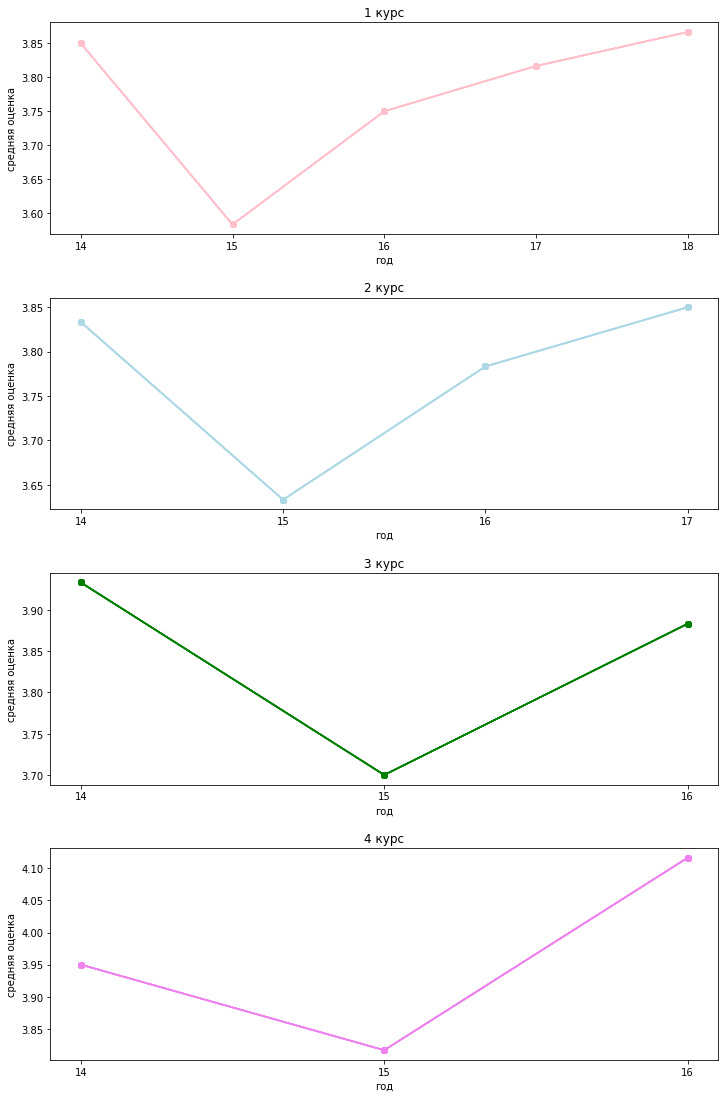

In [165]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)
colors = ['pink', 'lightblue', 'green', 'violet']

for i in range(4):
    for year in years:
        x = list(mean_rating_by_year[i+1].keys())
        y = list(mean_rating_by_year[i+1].values())

        try:
            none_index = y.index(None)
            x = x[:none_index]
            y = y[:none_index]
        except ValueError:
            pass
        
        axes[i].errorbar(x, y, color=colors[i], marker='o')
        # axes[i].bar(x, y, width=0.9, color=colors[i])
        
        axes[i].set_title(f"{i+1} курс")
        axes[i].set_xlabel('год')
        axes[i].set_ylabel('средняя оценка')
        
        axes[i].set_xticks(np.arange(min(x), max(x)+1, 1.0))
        # axes[i].set_yticks(np.arange(3, 5, 0.2))
